<a href="https://colab.research.google.com/github/Nataliia-Shap/SofPR/blob/main/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Кольорові простори

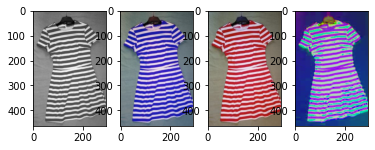

(463, 293)
[[123 122 122 ...  79  77  77]
 [122 122 124 ...  79  77  76]
 [127 130 128 ...  79  78  76]
 ...
 [121 121 119 ... 106 107 107]
 [122 122 119 ... 106 106 107]
 [122 122 119 ... 106 106 107]]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
nemo = cv2.imread('/content/drive/My Drive/Colab Notebooks/dress.png')
nemo_gray = cv2.imread('/content/drive/My Drive/Colab Notebooks/dress.png',cv2.IMREAD_GRAYSCALE)
nemo_rgb = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
nemo_gray = cv2.cvtColor(nemo, cv2.COLOR_BGR2GRAY)
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2HSV)
plt.subplot(1, 4, 1) 
plt.imshow(nemo_gray,cmap="gray")
plt.subplot(1, 4, 2) 
plt.imshow(nemo)
plt.subplot(1, 4, 3) 
plt.imshow(nemo_rgb)
plt.subplot(1, 4, 4)  
plt.imshow(hsv_nemo)
plt.show() 
#cv2_imshow(nemo_gray)  
print(nemo_gray.shape)  
print(nemo_gray)

### Створення маски червоного кольору

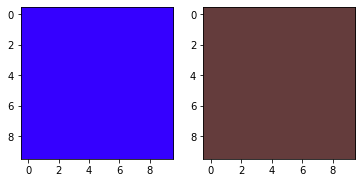

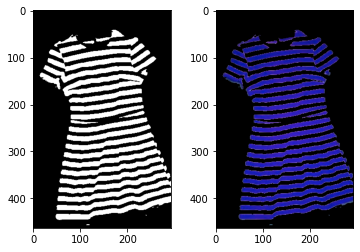

In [9]:
light_orange =np.array([0,100,100])
dark_orange = np.array([179,255,255]) 
from matplotlib.colors import hsv_to_rgb
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange) 
result = cv2.bitwise_and(nemo, nemo, mask= mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()      

### Створення маски білого кольору

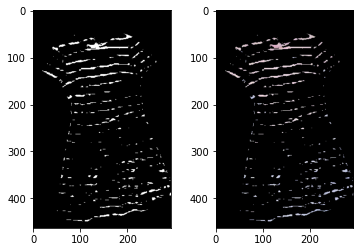

In [10]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)  
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white) 
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()  

### Створення об'єднаної маски

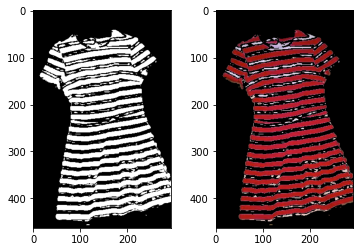

In [11]:
final_mask = mask + mask_white
result_F = cv2.bitwise_and(nemo_rgb, nemo_rgb, mask=final_mask) 
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_F)
plt.show() 

### Гістограма зображення

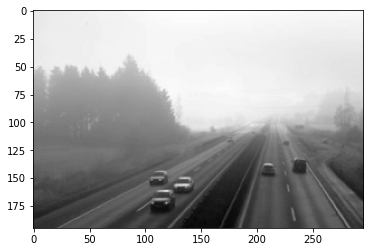

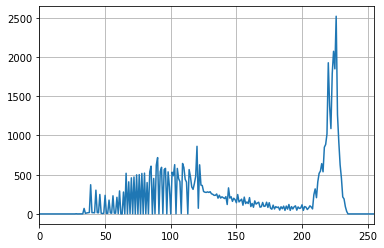

In [ ]:
road = cv2.imread('/content/drive/My Drive/Colab Notebooks/road.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(road,cmap="gray")
plt.show()
hist = cv2.calcHist([road], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 255])
plt.grid()
plt.show()

### Вирівнювання гістограми

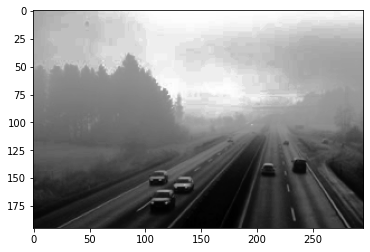

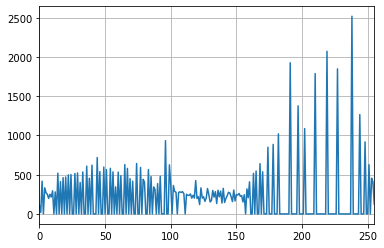

In [ ]:
equ = cv2.equalizeHist(road)
plt.imshow(equ,cmap="gray")
plt.show()
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 255])
plt.grid()
plt.show()

### Гаусове згладжування

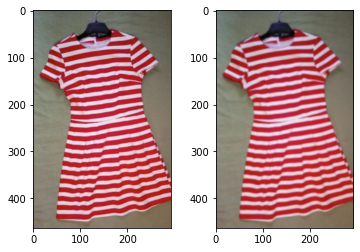

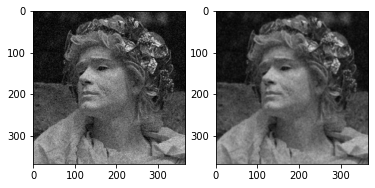

In [ ]:
nemo_blur = cv2.GaussianBlur(nemo_rgb,(5,5),0)
plt.subplot(1, 2, 1) 
plt.imshow(nemo_rgb)
plt.subplot(1, 2, 2)  
plt.imshow(nemo_blur )
plt.show() 
face = cv2.imread('/content/drive/My Drive/Colab Notebooks/face.png')
#face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
face_blur = cv2.GaussianBlur(face,(5,5),0)
plt.subplot(1, 2, 1) 
plt.imshow(face)
plt.subplot(1, 2, 2)  
plt.imshow(face_blur )
plt.show()

### Морфологічні операції

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


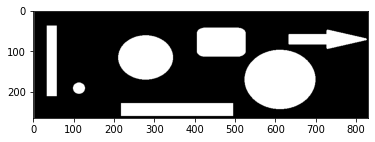

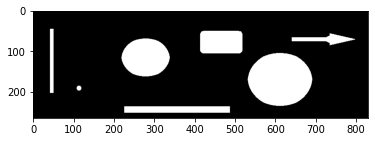

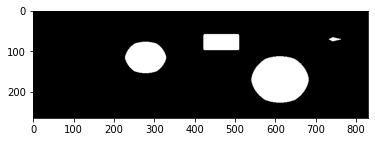

In [ ]:
from skimage.morphology import (erosion, dilation, opening, closing)
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(kernel)
fig = cv2.imread('/content/drive/My Drive/Colab Notebooks/figure1.png',cv2.IMREAD_GRAYSCALE)
#ret, image_edit = cv2.threshold(fig, 0, 255, cv2.THRESH_BINARY)
fig_erosion4 = cv2.erode(fig, kernel, iterations=4)
fig_erosion8 = cv2.erode(fig, kernel, iterations=8)
plt.imshow(fig,cmap="gray")
plt.show()  
plt.imshow(fig_erosion4,cmap="gray" )
plt.show()  
plt.imshow(fig_erosion8,cmap="gray" )
plt.show() 

### Ключові точки

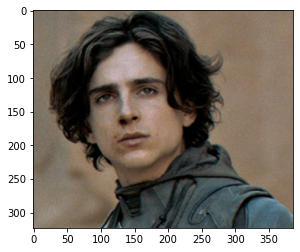

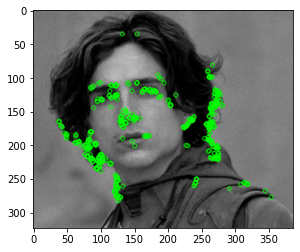

In [ ]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/face1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
kp = orb.detect(img_gray,None)
kp, des = orb.compute(img_gray, kp)
img2 = cv2.drawKeypoints(img_gray, kp, None, color=(0,255,0), flags=0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() 
plt.imshow(img2)
plt.show() 

### Порівняння ключових точок

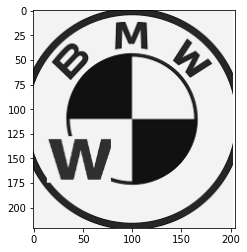

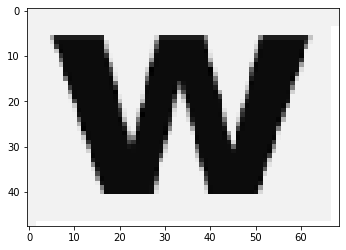

error: ignored

In [ ]:
ipsa1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/К1.png')
ipsa1_gray = cv2.cvtColor(ipsa1, cv2.COLOR_BGR2GRAY)
ipsa2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/К2.png')
ipsa2_gray = cv2.cvtColor(ipsa2, cv2.COLOR_BGR2GRAY)
plt.imshow(ipsa1_gray,cmap="gray")
plt.show() 
plt.imshow(ipsa2_gray,cmap="gray")
plt.show()
orb = cv2.ORB_create()
kp1 = orb.detect(img_gray,None)
kp1, des1 = orb.compute(ipsa1_gray, kp1)
kp2 = orb.detect(img_gray,None)
kp2, des2 = orb.compute(ipsa2_gray, kp2) 
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(ipsa1_gray,kp1,ipsa2_gray,kp2,matches[:10],None)
plt.imshow(img3,cmap="gray")
plt.show()